Uber Rides Data Analysis

Importing all the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
dataset.shape

(1156, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Removing Null Values

In [5]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

Changing the START_DATE and END_DATE to the date_time format

In [6]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
									errors='coerce')

Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [7]:
from datetime import datetime
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

Drop rows with null values

In [8]:
dataset.dropna(inplace=True)

Drop the duplicates

In [9]:
dataset.drop_duplicates(inplace=True)

Checking the unique values

In [10]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

Countplot the CATEGORY and PURPOSE

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

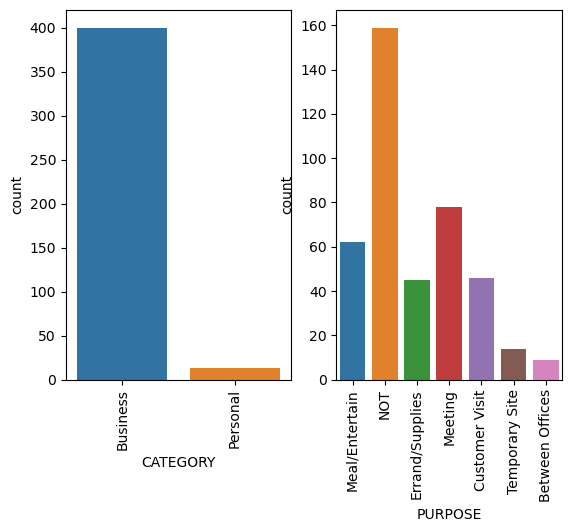

In [12]:
plt.subplot(1,2,1)
sns.countplot(data=dataset, x='CATEGORY')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(data=dataset, x='PURPOSE')
plt.xticks(rotation=90)

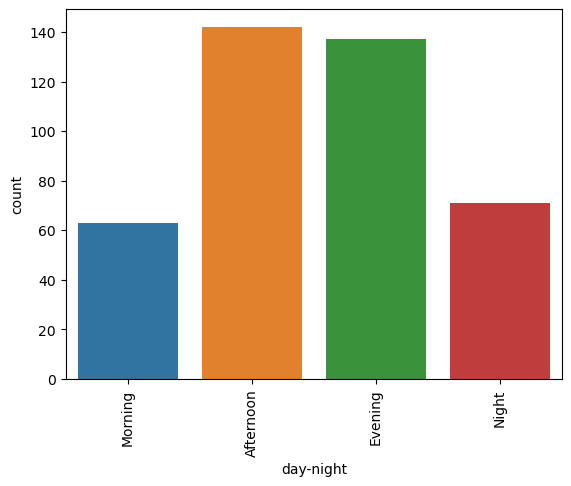

In [14]:
sns.countplot(data=dataset, x='day-night')
plt.xticks(rotation=90)
plt.show()

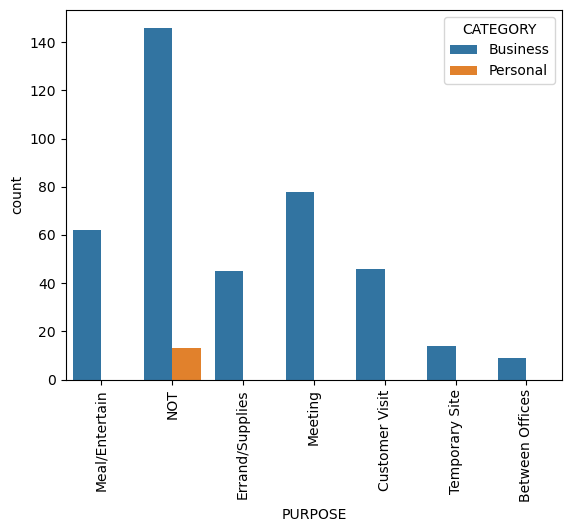

In [15]:
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

Insights from the above count-plots : 

1. Most of the rides are booked for business purpose.
2. Most of the people book cabs for Meetings and Meal / Entertain purpose.
3. Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

In [17]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
dataset.dropna(subset=object_cols, inplace=True)
OH_encoder = OneHotEncoder(sparse=False, drop='first')
OH_cols = OH_encoder.fit_transform(dataset[object_cols])
feature_names = OH_encoder.get_feature_names_out(object_cols)
OH_df = pd.DataFrame(OH_cols, columns=feature_names, index=dataset.index)
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_df], axis=1)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


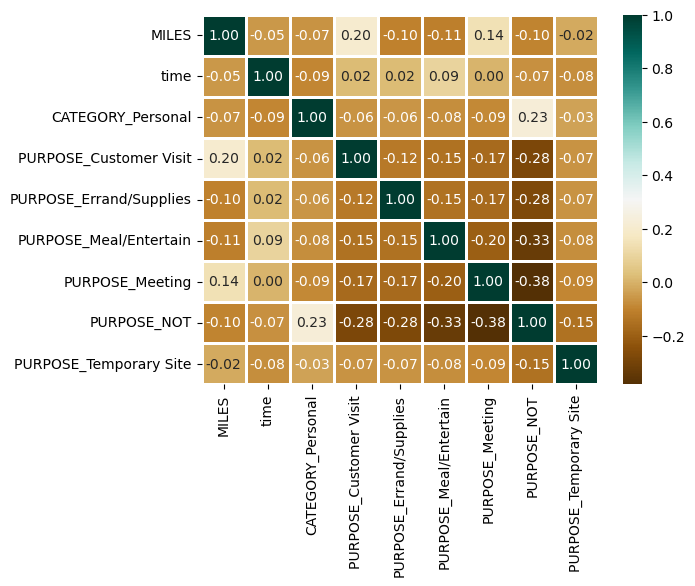

In [19]:
numeric_cols = dataset.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), 
            cmap='BrBG', 
            annot=True, 
            fmt='.2f', 
            linewidths=2)
plt.show()

Insights from the heatmap:
1. Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.

2. There is not much correlation between the features.

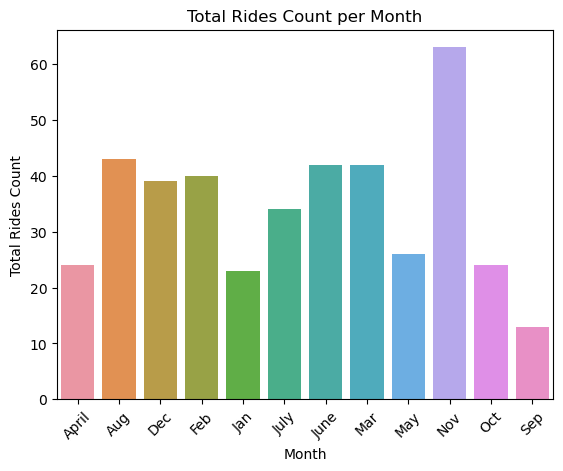

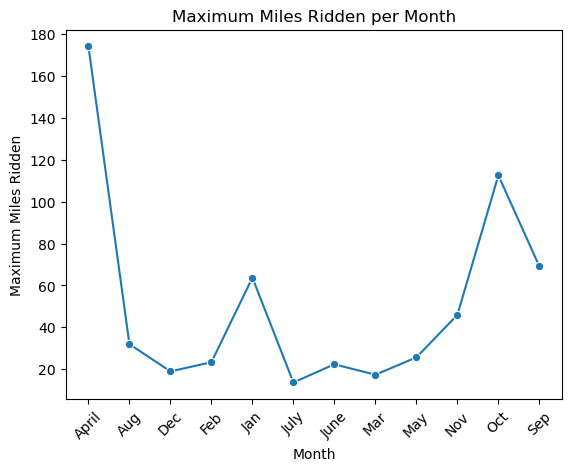

In [21]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

monthly_rides_count = dataset['MONTH'].value_counts().sort_index()

max_miles_per_month = dataset.groupby('MONTH')['MILES'].max()

sns.barplot(x=monthly_rides_count.index, y=monthly_rides_count.values)
plt.xlabel("Month")
plt.ylabel("Total Rides Count")
plt.title("Total Rides Count per Month")
plt.xticks(rotation=45)
plt.show()

sns.lineplot(x=max_miles_per_month.index, y=max_miles_per_month.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Maximum Miles Ridden")
plt.title("Maximum Miles Ridden per Month")
plt.xticks(rotation=45)
plt.show()

In [22]:
dataset['DAY'] = dataset['START_DATE'].dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

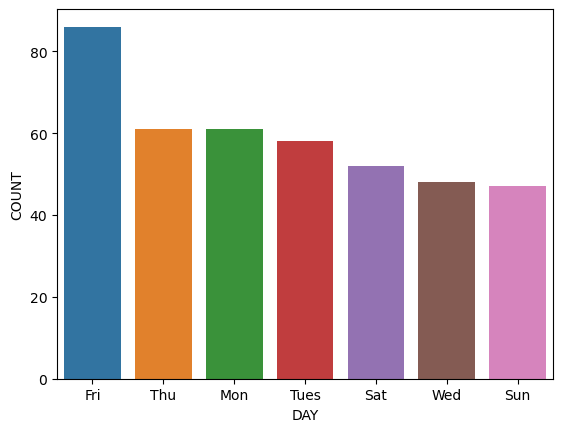

In [23]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: >

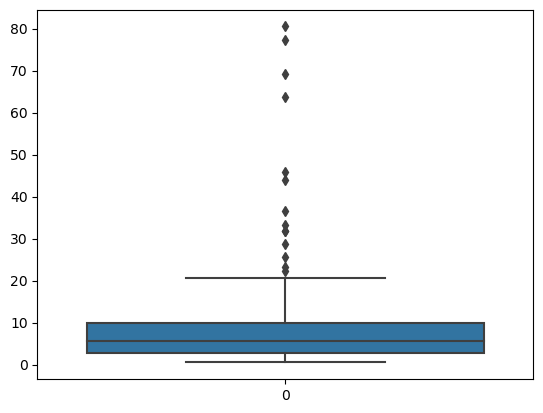

In [24]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

C:\Users\debar\AppData\Local\Temp\ipykernel_3256\1678554178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

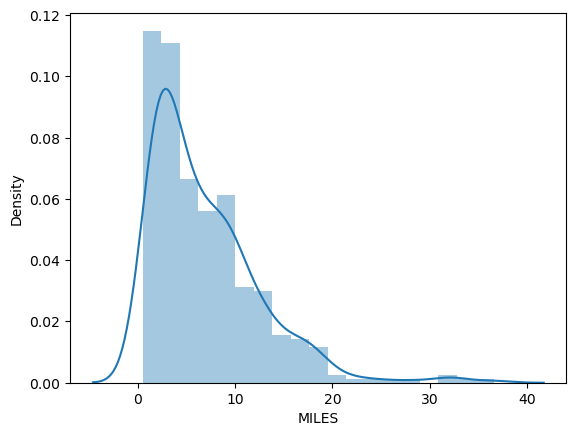

In [25]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

Insights from the above plots :
1. Most of the cabs booked for the distance of 4-5 miles.
2. Majorly people chooses cabs for the distance of 0-20 miles.
3. For distance more than 20 miles cab counts is nearly negligible.